Reference: https://github.com/theAIGuysCode/tensorflow-yolov4-tflite

In [23]:
import io
import os

from collections import defaultdict
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import backend as K
from keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D, MaxPool2D
from keras.layers.merge import add, concatenate
from keras.models import Model
from keras.utils import get_custom_objects
from keras.layers import Activation
from tensorflow.python.saved_model import tag_constants

import coremltools as ct

print("TensorFlow version is: {}".format(tf.__version__))
print("Eager execution is: {}".format(tf.executing_eagerly()))
print("Keras version is: {}".format(tf.keras.__version__))


TensorFlow version is: 2.3.1
Eager execution is: True
Keras version is: 2.4.0


In [24]:
saved_model_loaded = tf.saved_model.load('/Users/ankit/Documents/code/iOS/learn/CVRecorder/converters/yolov4-tiny-416', tags=[tag_constants.SERVING])

In [26]:
saved_model_loaded

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7fbe45607cd0>

In [4]:
keras_yolo_tiny = keras.models.load_model('/Users/ankit/Documents/code/iOS/learn/CVRecorder/converters/yolov4-tiny-416')

2022-05-23 07:41:05.298346: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-23 07:41:05.324010: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fbe8f2cfbb0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-23 07:41:05.324026: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [5]:
keras_yolo_tiny.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 417, 417, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 208, 208, 32) 864         zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 208, 208, 32) 128         conv2d[0][0]                     
_______________________________________________________________________________________

In [21]:
keras_yolo_tiny.inputs[0].shape

TensorShape([None, 416, 416, 3])

In [22]:
keras_yolo_tiny.outputs[0].shape

TensorShape([None, None, None])

In [9]:
tf.keras.utils.plot_model( keras_yolo_tiny, show_shapes=True)

In [13]:
tiny_yolo_coreml = ct.convert(keras_yolo_tiny, inputs=[ct.ImageType(scale=1 / 255.0)])

2022-05-23 07:47:03.067937: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-05-23 07:47:03.068063: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2022-05-23 07:47:03.080297: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:816] Optimization results for grappler item: graph_to_optimize
2022-05-23 07:47:03.080314: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:818]   function_optimizer: function_optimizer did nothing. time = 0.002ms.
2022-05-23 07:47:03.080319: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:818]   function_optimizer: function_optimizer did nothing. time = 0.001ms.
2022-05-23 07:47:04.224547: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-05-23 07:47:04

In [14]:
print(tiny_yolo_coreml)

input {
  name: "input_1"
  type {
    imageType {
      width: 416
      height: 416
      colorSpace: RGB
      imageSizeRange {
        widthRange {
          lowerBound: 416
          upperBound: 416
        }
        heightRange {
          lowerBound: 416
          upperBound: 416
        }
      }
    }
  }
}
output {
  name: "Identity"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
metadata {
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "tensorflow==2.3.1"
  }
  userDefined {
    key: "com.github.apple.coremltools.version"
    value: "4.0b3"
  }
}



In [27]:
y4m = tf.keras.models.load_model('tinyyolo_voc2007_modelweights.h5')

In [28]:
y4m.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 416, 416, 3)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 416, 416, 16)      432       
_________________________________________________________________
batch_normalization_1 (Batch (None, 416, 416, 16)      64        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 416, 416, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 208, 208, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 208, 208, 32)      4608      
_________________________________________________________________
batch_normalization_2 (Batch (None, 208, 208, 32)      128 

In [29]:
y4m.inputs

[<tf.Tensor 'input_1_1:0' shape=(None, 416, 416, 3) dtype=float32>]

In [30]:
y4m.outputs

[<tf.Tensor 'conv2d_9/BiasAdd:0' shape=(None, 13, 13, 125) dtype=float32>]

In [38]:
coreml_model = ct.convert(y4m, inputs=[ct.ImageType(scale=1 / 255.0)])

# coremltools.converters.convert(
#     y4m,
#     input_names='image',
#     image_input_names='image',
#     output_names='output',
#     image_scale=1./255.)

2022-05-23 08:14:34.753386: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-05-23 08:14:34.753470: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2022-05-23 08:14:34.758054: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:816] Optimization results for grappler item: graph_to_optimize
2022-05-23 08:14:34.758069: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:818]   function_optimizer: function_optimizer did nothing. time = 0.001ms.
2022-05-23 08:14:34.758074: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:818]   function_optimizer: function_optimizer did nothing. time = 0ms.
2022-05-23 08:14:36.259397: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-05-23 08:14:36.259

In [39]:
print(coreml_model)

input {
  name: "input_1"
  type {
    imageType {
      width: 416
      height: 416
      colorSpace: RGB
      imageSizeRange {
        widthRange {
          lowerBound: 416
          upperBound: 416
        }
        heightRange {
          lowerBound: 416
          upperBound: 416
        }
      }
    }
  }
}
output {
  name: "Identity"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
metadata {
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "tensorflow==2.3.1"
  }
  userDefined {
    key: "com.github.apple.coremltools.version"
    value: "4.0b3"
  }
}



In [40]:
from PIL import Image

def load_and_scale_image(image_url):
    image = Image.open(urllib.request.urlopen(image_url))
    w,h = image.size
    min_dim = min(w,h)
    x0 = int((w - min_dim)/2)
    y0 = int((h - min_dim)/2)
    box = (x0, y0, x0 + min_dim, y0 + min_dim)
    return image.crop(box=box).resize((416,416))

def load_local_and_scale_image(image_path):
    image = Image.open(image_path)
    w,h = image.size
    min_dim = min(w,h)
    x0 = int((w - min_dim)/2)
    y0 = int((h - min_dim)/2)
    box = (x0, y0, x0 + min_dim, y0 + min_dim)
    return image.crop(box=box).resize((416,416))

In [106]:
GRID_SIZE = 13
CELL_SIZE = int(416 / GRID_SIZE)
BOXES_PER_CELL = 1


ANCHORS = [[1.08, 1.19],
           [3.42, 4.41],
           [6.63, 11.38],
           [9.42, 5.11],
           [16.62, 10.52]
          ]
# ANCHORS = [[0.57273, 0.677385], 
#            [1.87446, 2.06253], 
#            [3.33843, 5.47434], 
#            [7.88282, 3.52778], 
#            [9.77052, 9.16828]]

In [107]:
with open('voc.names', 'r') as f:
    COCO_CLASSES = [c.strip() for c in f.readlines()]
    
COCO_CLASSES[:5]

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle']

In [108]:
len(COCO_CLASSES)

20

In [109]:
def sigmoid(x):
    k = np.exp(-x)
    return 1 / (1 + k)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [110]:
def decode_preds2(raw_preds: []):
    num_classes = len(COCO_CLASSES)
    decoded_preds = []
                
    for cy in range(GRID_SIZE):
        for cx in range(GRID_SIZE):
            for b in range (BOXES_PER_CELL):
                print(f'cy ={cy}--- cx ={cx} --- b={b}')
                box_shift = b*(num_classes + 5)
            
                tx = float(raw_preds[0, cy, cx, box_shift])
                ty = float(raw_preds[0, cy, cx, box_shift + 1])
                tw = float(raw_preds[0, cy, cx, box_shift + 2])
                th = float(raw_preds[0, cy, cx, box_shift + 3])
                ts = float(raw_preds[0, cy, cx, box_shift + 4])

                x = (float(cx) + sigmoid(tx)) * CELL_SIZE
                y = (float(cy) + sigmoid(ty)) * CELL_SIZE
            
                w = np.exp(tw) * ANCHORS[b][0] * CELL_SIZE
                h = np.exp(th) * ANCHORS[b][1] * CELL_SIZE
            
                box_confidence = sigmoid(ts)
                classes_raw = raw_preds[0, cy, cx, box_shift + 5:box_shift + 5 + num_classes]
                classes_confidence = softmax(classes_raw)
            
                box_class_idx = np.argmax(classes_confidence)
                box_class_confidence = classes_confidence[box_class_idx]

                combined_confidence = box_confidence * box_class_confidence
            
                decoded_preds.append([box_class_idx, combined_confidence, x, y, w, h])            
    
    return sorted(decoded_preds, key=lambda p: p[1], reverse=True)

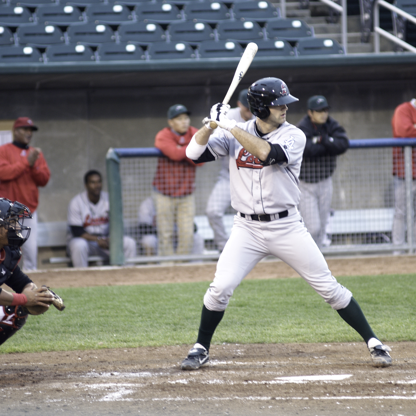

In [111]:
import urllib
image = load_and_scale_image('https://c1.staticflickr.com/6/5107/5656028725_738189efa2_o.jpg')
image

In [112]:
image.size

(416, 416)

In [113]:
preds = coreml_model.predict(data={'input_1': image})['Identity']

In [114]:
preds.shape

(1, 13, 13, 125)

In [115]:
decoded_preds = decode_preds2(preds)

cy =0--- cx =0 --- b=0
cy =0--- cx =1 --- b=0
cy =0--- cx =2 --- b=0
cy =0--- cx =3 --- b=0
cy =0--- cx =4 --- b=0
cy =0--- cx =5 --- b=0
cy =0--- cx =6 --- b=0
cy =0--- cx =7 --- b=0
cy =0--- cx =8 --- b=0
cy =0--- cx =9 --- b=0
cy =0--- cx =10 --- b=0
cy =0--- cx =11 --- b=0
cy =0--- cx =12 --- b=0
cy =1--- cx =0 --- b=0
cy =1--- cx =1 --- b=0
cy =1--- cx =2 --- b=0
cy =1--- cx =3 --- b=0
cy =1--- cx =4 --- b=0
cy =1--- cx =5 --- b=0
cy =1--- cx =6 --- b=0
cy =1--- cx =7 --- b=0
cy =1--- cx =8 --- b=0
cy =1--- cx =9 --- b=0
cy =1--- cx =10 --- b=0
cy =1--- cx =11 --- b=0
cy =1--- cx =12 --- b=0
cy =2--- cx =0 --- b=0
cy =2--- cx =1 --- b=0
cy =2--- cx =2 --- b=0
cy =2--- cx =3 --- b=0
cy =2--- cx =4 --- b=0
cy =2--- cx =5 --- b=0
cy =2--- cx =6 --- b=0
cy =2--- cx =7 --- b=0
cy =2--- cx =8 --- b=0
cy =2--- cx =9 --- b=0
cy =2--- cx =10 --- b=0
cy =2--- cx =11 --- b=0
cy =2--- cx =12 --- b=0
cy =3--- cx =0 --- b=0
cy =3--- cx =1 --- b=0
cy =3--- cx =2 --- b=0
cy =3--- cx =3 --- b=0
cy

In [119]:
preds[:2]

array([[[[ 2.73733139e-01,  7.81942785e-01,  7.23064691e-02, ...,
          -1.12385738e+00,  1.68954372e-01,  1.92577267e+00],
         [ 7.16423467e-02,  1.23897505e+00,  6.46605432e-01, ...,
          -1.12754095e+00, -3.10458630e-01,  3.00192118e+00],
         [-6.48043901e-02,  9.62738335e-01,  6.76870883e-01, ...,
          -1.02022541e+00, -3.78708661e-01,  3.76070547e+00],
         ...,
         [-1.99853048e-01,  5.83582699e-01,  1.12389706e-01, ...,
          -4.24257696e-01,  4.63213354e-01,  8.21468830e-01],
         [-2.73924708e-01,  3.32797617e-01, -5.96466549e-02, ...,
           2.57076956e-02,  6.58607006e-01,  1.97949916e-01],
         [-2.14925870e-01,  3.02103192e-01, -1.15975566e-01, ...,
          -4.32949752e-01,  8.07808220e-01,  7.80538172e-02]],

        [[ 3.21422905e-01, -8.62620831e-01, -1.46228252e-02, ...,
          -1.39512455e+00,  6.10679209e-01,  2.24760699e+00],
         [-2.83279568e-02, -1.28341401e+00,  6.52365208e-01, ...,
          -1.07283878e

In [126]:
import copy
from PIL import ImageDraw, ImageColor

def annotate_image(image, preds, min_score=0.0015, top=20):
    annotated_image = copy.deepcopy(image)
    draw = ImageDraw.Draw(annotated_image)
    w,h = image.size
    
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'white']
    
    for class_id, score, xc, yc, w, h in preds[:top]:
        if score < min_score:
            print(score)
            continue
        class_id = int(class_id)
        label = COCO_CLASSES[class_id]
            
        x0 = xc - (w / 2)
        y0 = yc - (h / 2)
        color = ImageColor.colormap[colors[class_id % len(colors)]]
        draw.rectangle([(x0, y0), (x0 + w, y0 + h)], width=2, outline=color)
        draw.text((x0 + 5, y0 + 5), "{} {:0.2f}".format(label, score), fill=color)
    
    return annotated_image

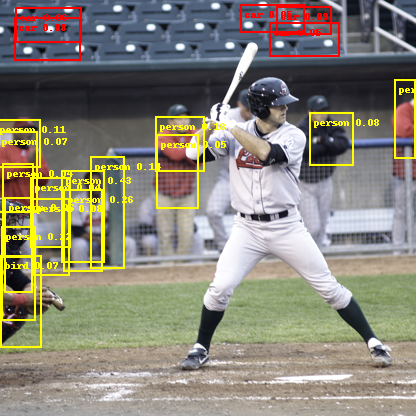

In [127]:
annotate_image(image, decoded_preds)